In [5]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = None
usuarios = []
dataset = []

In [7]:
def set_hostnames(number_of_hosts: int) -> None:
    
    lista_alpha = []
    lista_os = ["L"]*4 + ["S"]*3 + ["A"]*2 + ["H"]
    lista_env = ["D"]*10 + ["I"]*10 + ["T"]*25 + ["S"]*25 + ["P"]*30
    lista_land = ["NOR"]*6 + ["FRA"]*9 + ["ITA"]*16 + ["ESP"]*16 + ["DEU"]*23 + ["IRL"]*30
    
    for i in range(number_of_hosts):
        nombre = ""
        nombre += lista_os[random.randint(0, 9)]
        nombre += lista_env[random.randint(0, 99)]
        nombre += lista_land[random.randint(0, 99)]
        
        lista_alpha.append(nombre)
        cuenta = str(lista_alpha.count(nombre)).zfill(3)
        
        if int(cuenta) >999:
            cuenta = str(999)
            
        usuarios.append(nombre+cuenta)
          
def get_os(hostname) -> str:


    if hostname[0] == "L":
         return "Linux"
    elif hostname[0] == "S":
          return "Solaris"
    elif hostname[0] == "A":
        return "AIX"
    elif hostname[0] == "H":
         return "HP-UX"
    else:
        return "Unknown"
    
    
    
def get_environment(hostname) -> str:
       
    if hostname[1] == "D":
        return 'Development'
    elif hostname[1] == "I":
        return 'Integration'
    elif hostname[1] == "T":
        return "Testing"
    elif hostname[1] == "S":
        return "Staging"
    elif hostname[1] == "P":
        return "Production"

    else:
        return "Unknown"


def get_country(hostname) -> str:

    if hostname[2:5] == "NOR":
        return "Norway"
    elif hostname[2:5] == "DEU":
        return "Germany"
    elif hostname[2:5] == "ITA":
        return "Italy"
    elif hostname[2:5] == "ESP":
        return "Spain"
    elif hostname[2:5] == "IRL":
        return "Ireland"
    elif hostname[2:5] == "FRA":
        return "France"
    else:
        return "Unknown"


In [8]:
def set_dataframe(count: int) -> None:
    global df
    set_hostnames(count)
    
    for user in usuarios:
        dataset.append({
            "hostname" : user,
            "os": get_os(user),
            "environment" : get_environment(user),
            "country" : get_country(user),
            "node" : int(user[5:8])
        }
        )
            
    df = pd.DataFrame(dataset)

In [10]:
set_dataframe(1500)
print("df global:")
df

df global:


,hostname,os,environment,country,node
0,SSIRL001,Solaris,Staging,Ireland,1
1,SIIRL001,Solaris,Integration,Ireland,1
2,LDDEU001,Linux,Development,Germany,1
3,APDEU001,AIX,Production,Germany,1
4,LPFRA001,Linux,Production,France,1
...,...,...,...,...,...
1495,STESP010,Solaris,Testing,Spain,10
1496,HDESP004,HP-UX,Development,Spain,4
1497,SSIRL042,Solaris,Staging,Ireland,42
1498,LTIRL042,Linux,Testing,Ireland,42


In [11]:
df.to_csv("hosts.csv", header=True, index = False)
hosts_df = pd.read_csv("hosts.csv")
print("df de csv:")
hosts_df

df de csv:


,hostname,os,environment,country,node
0,SSIRL001,Solaris,Staging,Ireland,1
1,SIIRL001,Solaris,Integration,Ireland,1
2,LDDEU001,Linux,Development,Germany,1
3,APDEU001,AIX,Production,Germany,1
4,LPFRA001,Linux,Production,France,1
...,...,...,...,...,...
1495,STESP010,Solaris,Testing,Spain,10
1496,HDESP004,HP-UX,Development,Spain,4
1497,SSIRL042,Solaris,Staging,Ireland,42
1498,LTIRL042,Linux,Testing,Ireland,42


<Axes: xlabel='country'>

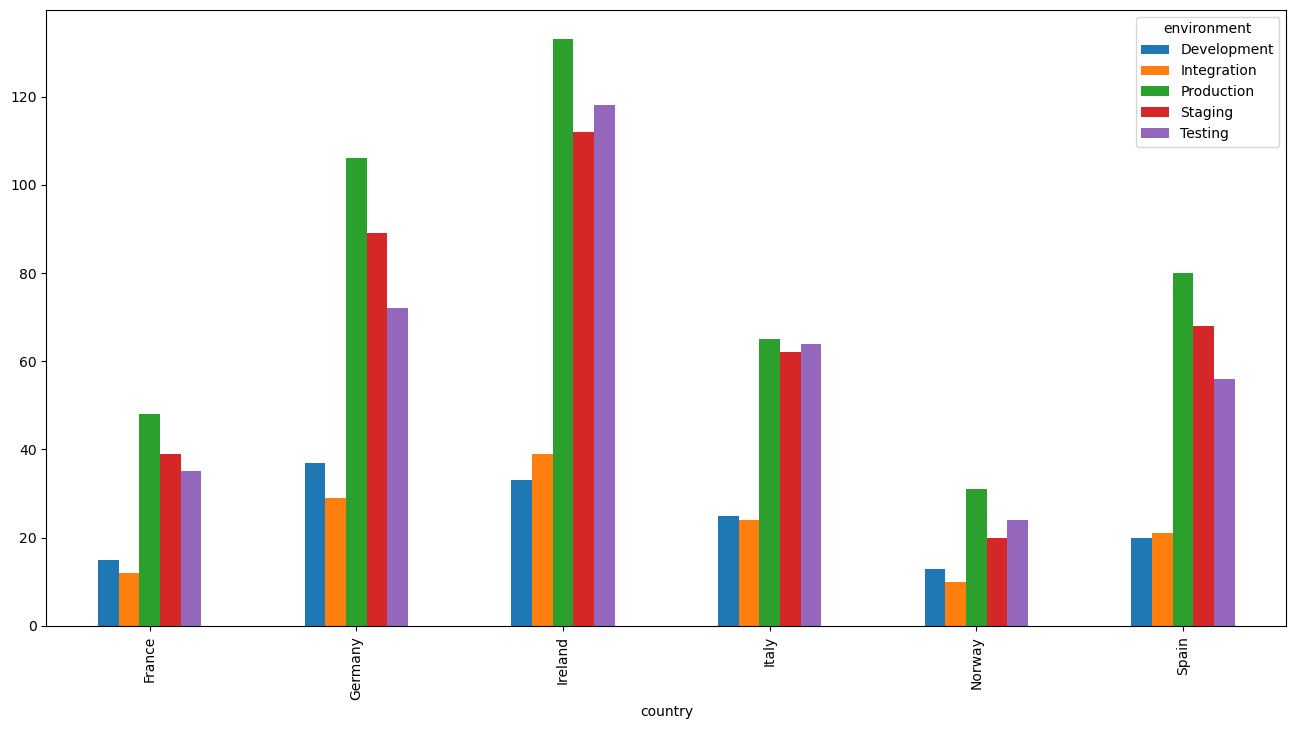

In [12]:
plt.rcParams['figure.figsize'] = [16, 8]
df.groupby(['country', 'environment']).size().unstack().plot(kind="bar")

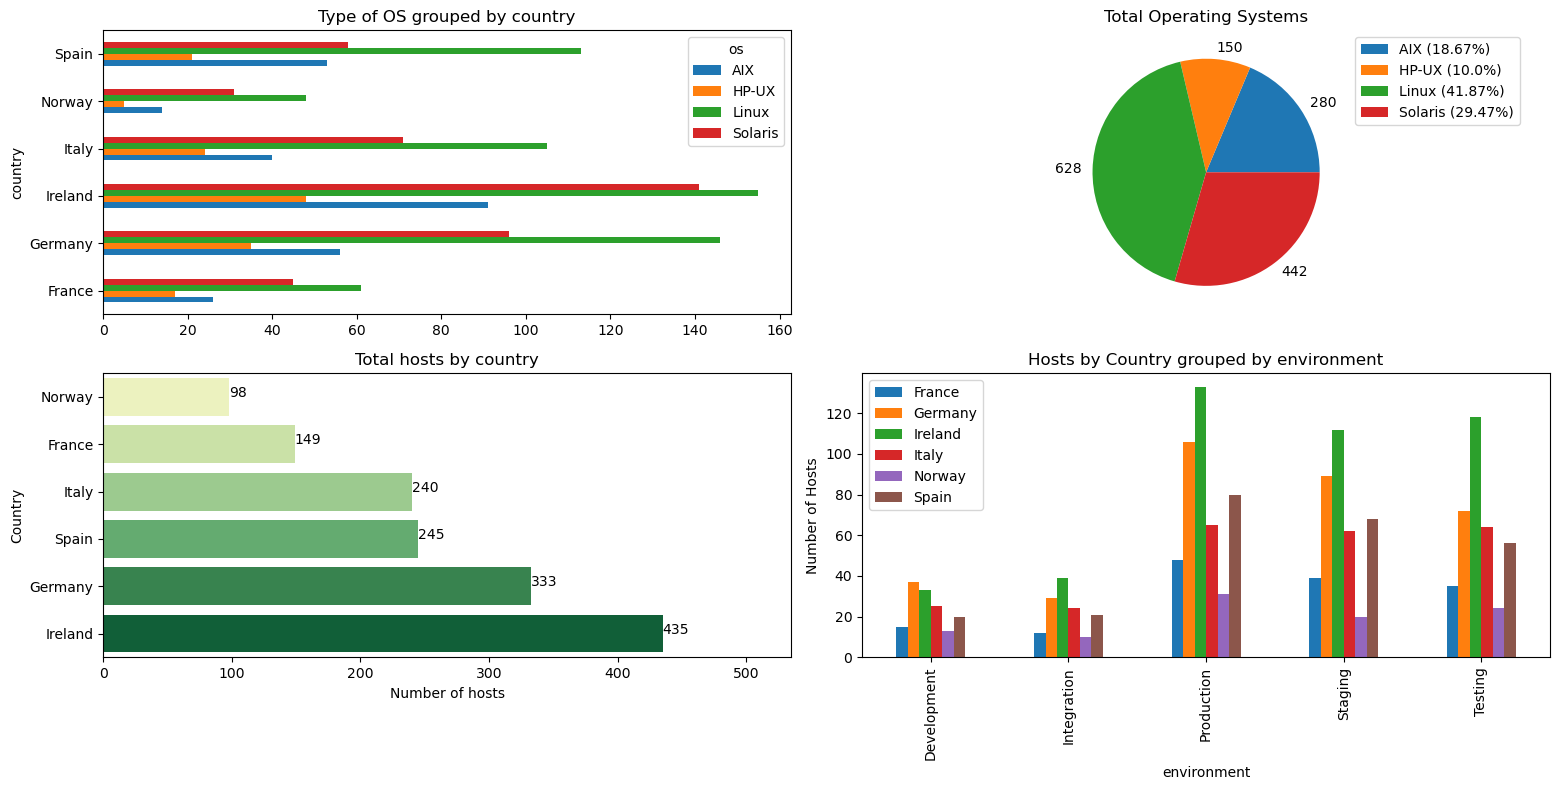

In [13]:
fig, axs = plt.subplots(2, 2)
#-----------
df.groupby(['country', 'os']).size().unstack().plot(kind="barh", ax=axs[0, 0])
axs[0, 0].set_title("Type of OS grouped by country")
#-----------
            
df_para_Pie = pd.DataFrame(df.groupby(['os']).size())
df_para_Pie.reset_index(inplace=True)
df_para_Pie.columns = ["os", "cantidad"]
df_para_Pie["porcentaje"] = (df_para_Pie["cantidad"] / df_para_Pie["cantidad"].sum())*100

axs[0, 1].pie(df_para_Pie['cantidad'], labels=df_para_Pie['cantidad'])

L = axs[0, 1].legend()
L.set_bbox_to_anchor((1, 1))

for index, row in df_para_Pie.iterrows():
    primero = row["os"]
    segundo = str(round(row["porcentaje"], ndigits=2))
    L.get_texts()[index].set_text(primero + " (" + segundo + "%" + ")")


axs[0, 1].set_title("Total Operating Systems")

#-----------
df_Host_per_Country = pd.DataFrame(df.value_counts("country"))
df_Host_per_Country.columns = ["number of hosts"]

           
df_Host_per_Country.reset_index(inplace=True)
df_Host_per_Country.sort_values('number of hosts', ascending=True, inplace=True)

sns.barplot(x="number of hosts", y="country",
            data=df_Host_per_Country,
            ax=axs[1, 0],
            palette="YlGn")

for index, value in enumerate(df_Host_per_Country["number of hosts"]):
    axs[1, 0].text(value, index,
    str(value))

axs[1, 0].set_xlim(0, df_Host_per_Country['number of hosts'].max() + 100)
axs[1, 0].set_ylabel('Country')
axs[1, 0].set_xlabel('Number of hosts')
axs[1, 0].set_title("Total hosts by country")

#-----------
df_cuarto = df.groupby(["country", "environment"]).size().unstack(0).plot(kind="bar",ax=axs[1, 1])

axs[1,1].legend(loc='upper left')
axs[1, 1].set_ylabel('Number of Hosts')
axs[1, 1].set_title("Hosts by Country grouped by environment")

fig.tight_layout()
            
plt.rcParams['figure.figsize'] = [30, 15]

plt.show()